In [6]:
pip install pandas numpy seaborn

   Expected_Ride_Duration  Historical_Cost_of_Ride  adjusted_price
0                      90               284.257273             2.0
1                      43               173.874753             1.0
2                      76               329.795469             2.0
3                     134               470.201232             1.0
4                     149               579.681422             2.0
Total Revenue: 75817.50
Adjusted pricing data saved as 'pricing_adjusted_data.csv'


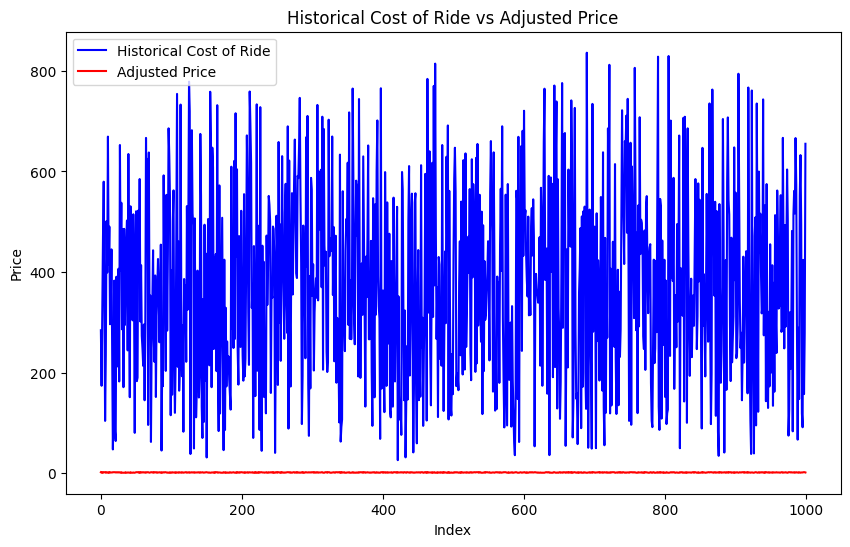

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the cleaned dataset 
file_path = '../cleaned_dynamic_pricing.csv'  
df = pd.read_csv(file_path)

#  Initializing  the pricing model 

class PricingModel:
    def __init__(self, action_space):
        self.action_space = action_space
        

    def choose_action(self, state):
        #  choosing a random action (price) from the action space
        action = np.random.choice(self.action_space)  
        return action

# Initialize the model with possible price actions 
pricing_model = PricingModel(action_space=[1.0, 1.5, 2.0])  

# List to store adjusted prices
prices_adjusted = []

# Loop over the rows in the DataFrame and apply the pricing model
for idx in range(len(df)): 

    state = [df.iloc[idx]['Expected_Ride_Duration'], df.iloc[idx]['Historical_Cost_of_Ride']]
    
    # Use the pricing model to choose an action (price adjustment) based on the state
    action = pricing_model.choose_action(state)
    
    # Store the adjusted price 
    price_adjusted = action  
    prices_adjusted.append(price_adjusted)


df['adjusted_price'] = prices_adjusted

#  Display the DataFrame with adjusted prices
print(df[['Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'adjusted_price']].head())

#  Evaluate the model's performane
if 'Number_of_Past_Rides' in df.columns:
    df['revenue'] = df['adjusted_price'] * df['Number_of_Past_Rides']
    total_revenue = df['revenue'].sum()
    print(f"Total Revenue: {total_revenue:.2f}")


# Assuming 'df' is the DataFrame that contains your data with adjusted prices

# Save the DataFrame with adjusted prices
df.to_csv('pricing_adjusted_data.csv', index=False)  

print("Adjusted pricing data saved as 'pricing_adjusted_data.csv'")


df.to_csv('../evaluated_pricing_model.csv', index=False)

#Visualization of the adjusted prices vs competitor prices 
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['Historical_Cost_of_Ride'], label='Historical Cost of Ride', color='blue')
sns.lineplot(x=df.index, y=df['adjusted_price'], label='Adjusted Price', color='red')
plt.legend()
plt.title('Historical Cost of Ride vs Adjusted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()
